## Lab 11: Introduction to CNN for Image Classification

Objective: Build a simple CNN to classify CIFAR-10 images



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.3072 - loss: 1.8683 - val_accuracy: 0.4862 - val_loss: 1.4149
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.5213 - loss: 1.3297 - val_accuracy: 0.5402 - val_loss: 1.2723
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5861 - loss: 1.1686 - val_accuracy: 0.6174 - val_loss: 1.1041
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6307 - loss: 1.0500 - val_accuracy: 0.6484 - val_loss: 1.0198
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6624 - loss: 0.9631 - val_accuracy: 0.6586 - val_loss: 0.9850
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6847 - loss: 0.8984 - val_accuracy: 0.6597 - val_loss: 0.9785
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.7008 - loss: 0.8524 - val_accuracy: 0.6807 - val_loss: 0.9255
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7244 - loss: 0.8017 - 

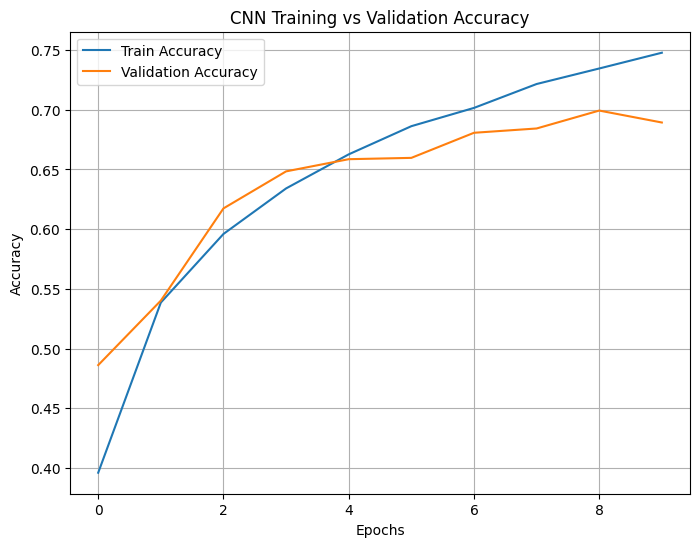

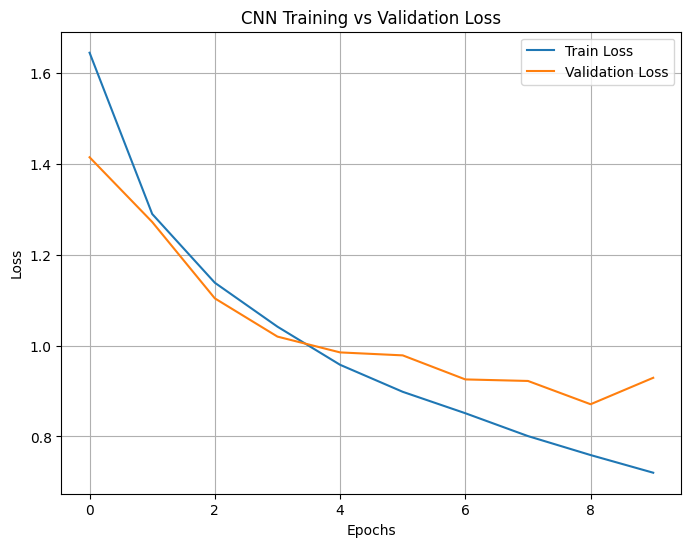

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


/tmp/ipython-input-3406644811.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[int(y_test[i])]}")


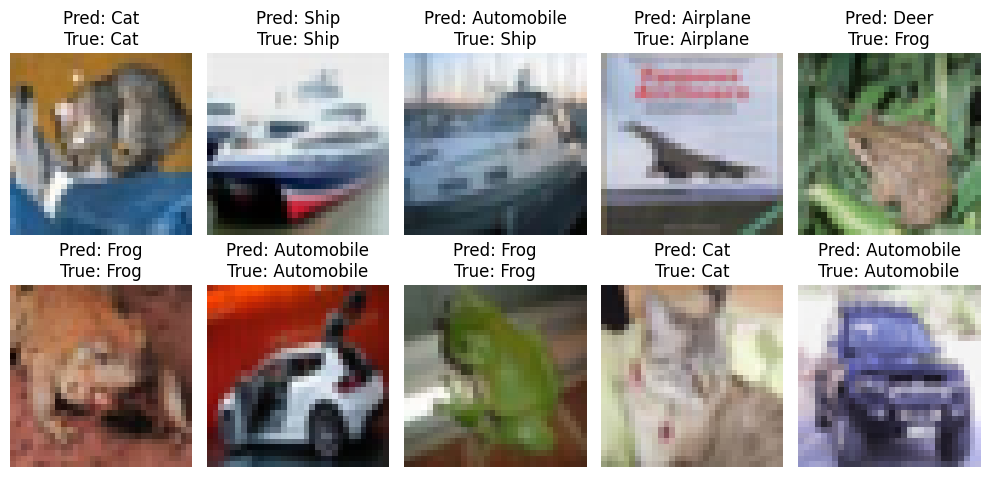

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 2. Build CNN model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 3. Train model
model = build_cnn()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

# 4. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 5. Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 7. Display sample predictions
import numpy as np
preds = model.predict(x_test[:10])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


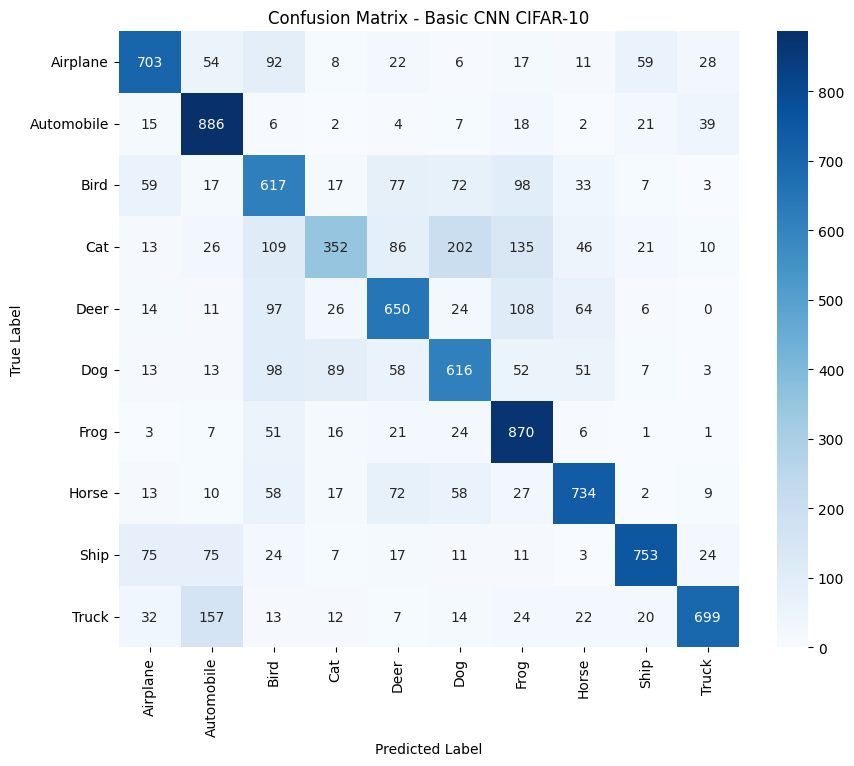


Classification Report - Basic CNN CIFAR-10
              precision    recall  f1-score   support

    Airplane       0.75      0.70      0.72      1000
  Automobile       0.71      0.89      0.79      1000
        Bird       0.53      0.62      0.57      1000
         Cat       0.64      0.35      0.46      1000
        Deer       0.64      0.65      0.65      1000
         Dog       0.60      0.62      0.61      1000
        Frog       0.64      0.87      0.74      1000
       Horse       0.76      0.73      0.74      1000
        Ship       0.84      0.75      0.79      1000
       Truck       0.86      0.70      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 8. Generate predictions for the entire test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Flatten true labels
y_true = y_test.flatten()

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Basic CNN CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10. Classification Report
print("\nClassification Report - Basic CNN CIFAR-10")
print(classification_report(y_true, y_pred, target_names=class_names))
